#THis is where I will play with stuffs to gain understanding of the important concepts.



In [ ]:
#PLaying with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_iris
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df["target"] = iris_dataset["target"]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


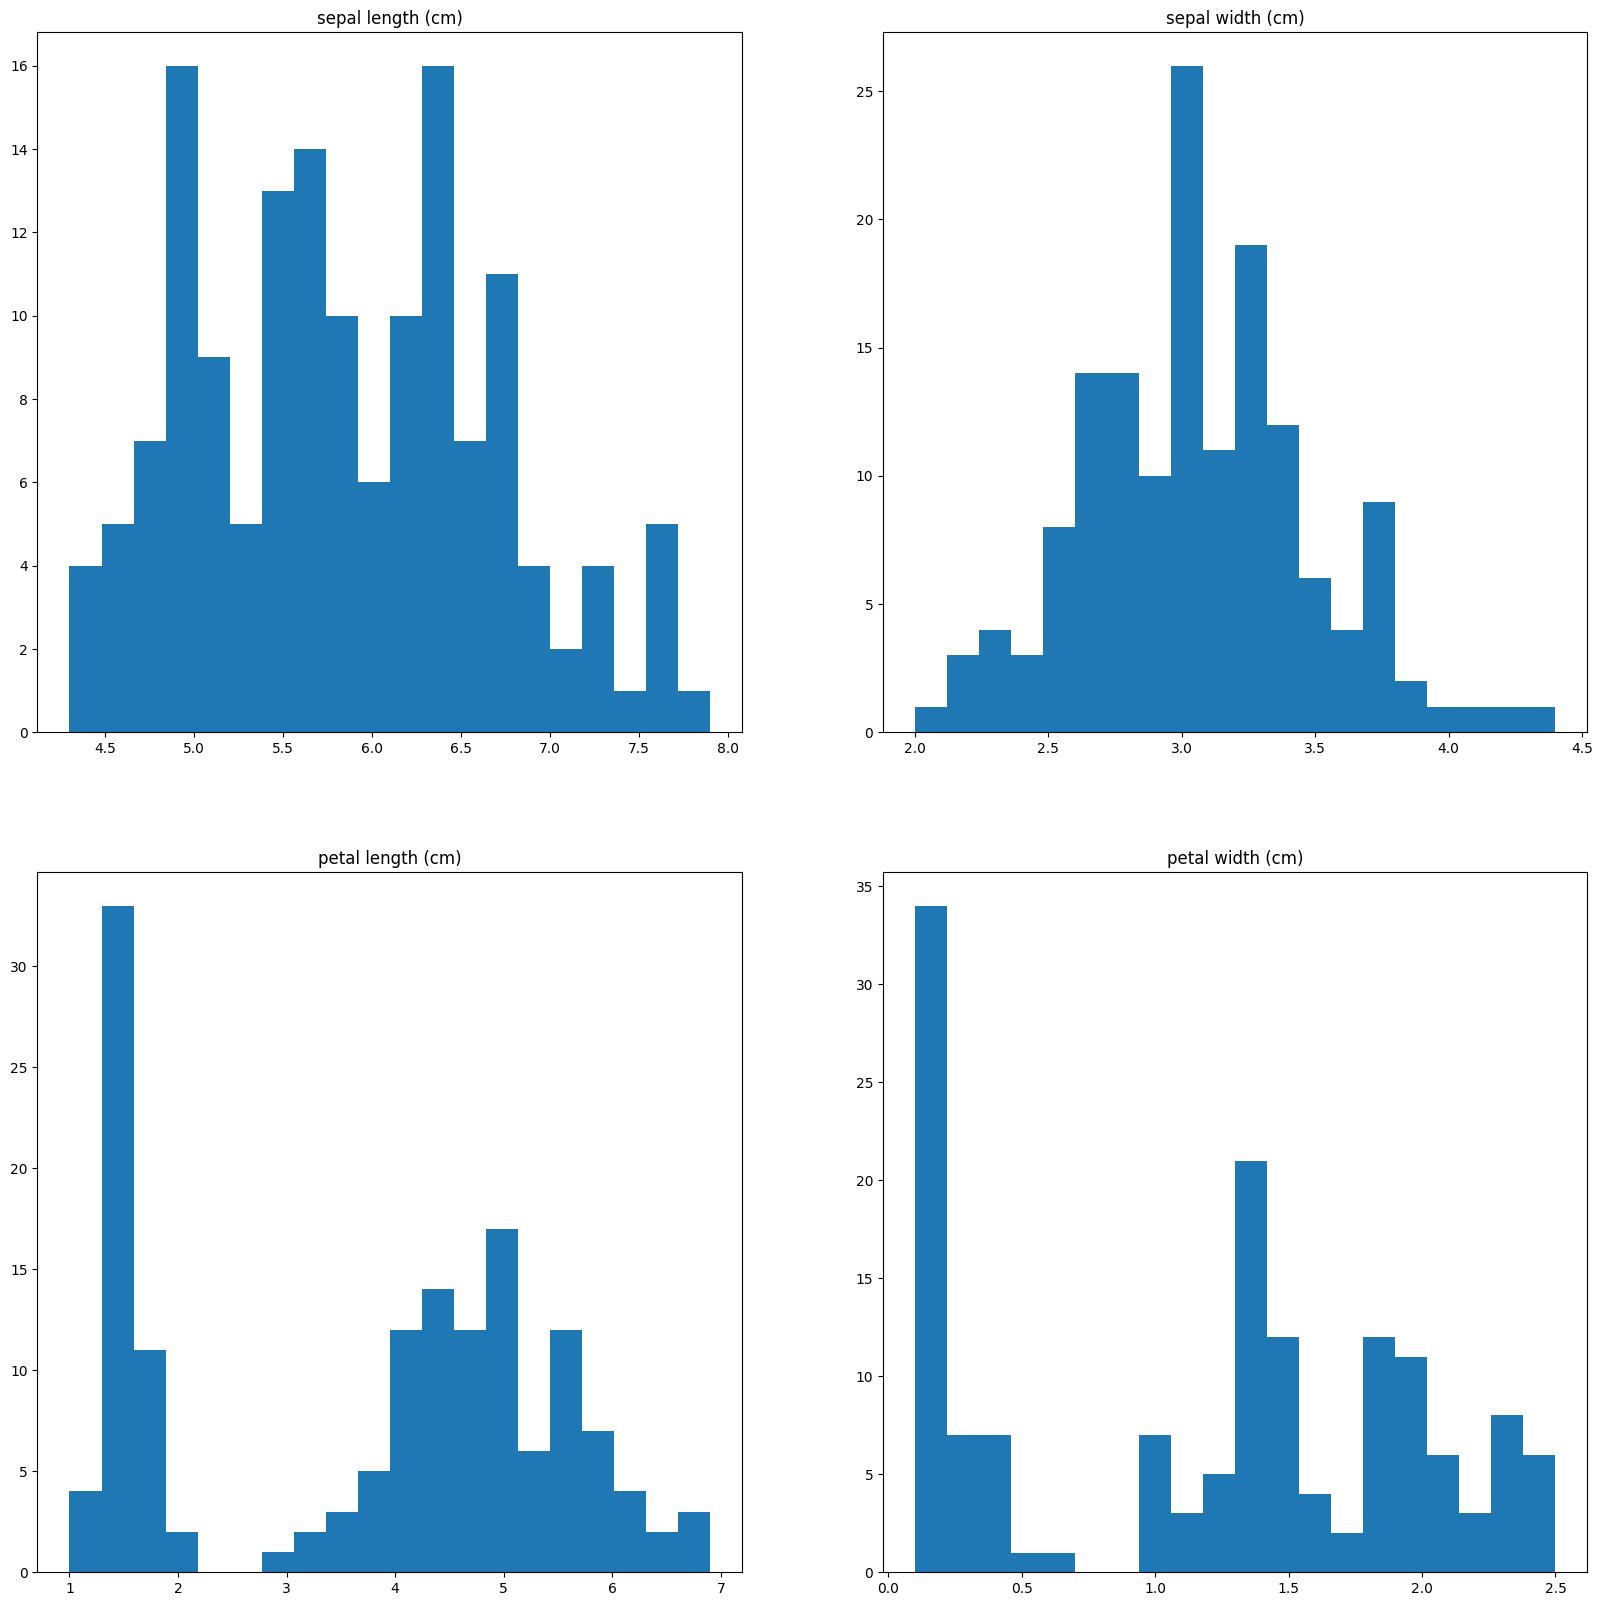

In [ ]:
df.describe()

fig,axs = plt.subplots(2,2, figsize=(20,20))
axs[0][0].hist(df['sepal length (cm)'], bins=20)
axs[0][0].set_title('sepal length (cm)')
axs[0][1].hist(df['sepal width (cm)'], bins=20)
axs[0][1].set_title('sepal width (cm)')
axs[1][0].hist(df['petal length (cm)'], bins=20)
axs[1][0].set_title('petal length (cm)')
axs[1][1].hist(df['petal width (cm)'], bins=20)
axs[1][1].set_title('petal width (cm)')
plt.show()


In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


#Ok so looking at the correlation table, we see that there is a stong correalation of sepal length with petal length and petal width with sepal and petal length. We will visualize them in scatterplot.


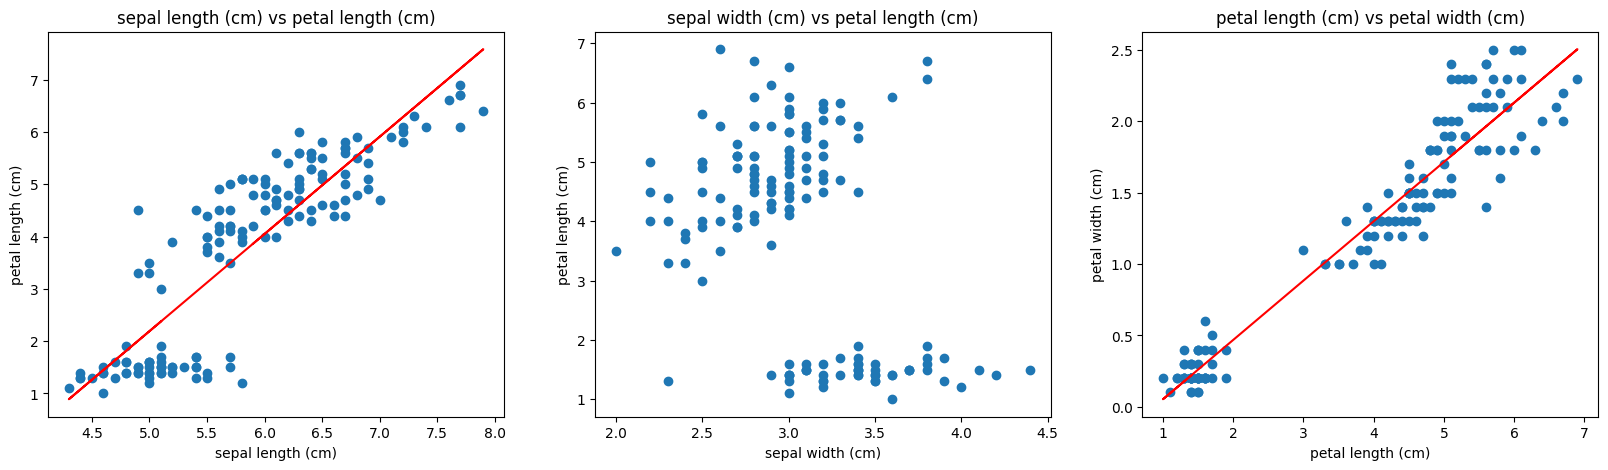

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']
petal_length = df['petal length (cm)']
petal_width = df['petal width (cm)']

m, b = np.polyfit(sepal_length, petal_length, 1)
axs[0].plot(sepal_length, m*sepal_length + b, color='red')

axs[0].scatter(sepal_length,petal_length)
axs[0].set_title('sepal length (cm) vs petal length (cm)')
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('petal length (cm)')

#Linear fit doeen't work with this as it looks kind of cluster, we should use logistic fit.

axs[1].scatter(df['sepal width (cm)'],df['petal length (cm)'])
axs[1].set_title('sepal width (cm) vs petal length (cm)')
axs[1].set_xlabel('sepal width (cm)')
axs[1].set_ylabel('petal length (cm)')

m,b = np.polyfit(petal_length, petal_width, 1)
axs[2].plot(petal_length, m*petal_length + b, color='red')
axs[2].scatter(df['petal length (cm)'],df['petal width (cm)'])
axs[2].set_title('petal length (cm) vs petal width (cm)')
axs[2].set_xlabel('petal length (cm)')
axs[2].set_ylabel('petal width (cm)')
plt.show()

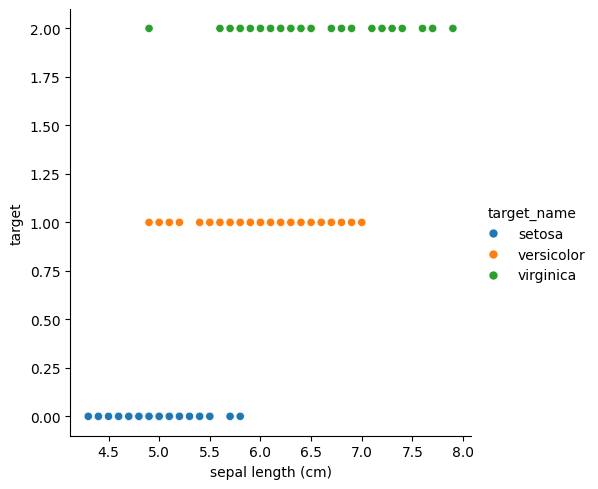

In [ ]:
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})


import seaborn as sns
sns.relplot(x=sepal_length, y="target", hue="target_name", data=df)



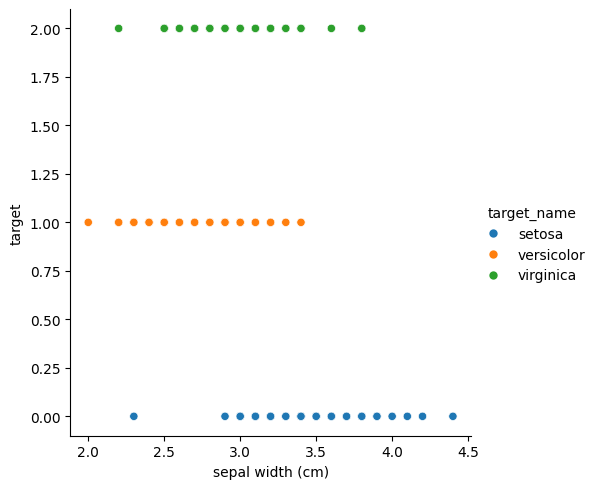

In [ ]:
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})


import seaborn as sns
sns.relplot(x=sepal_width, y="target", hue="target_name", data=df)


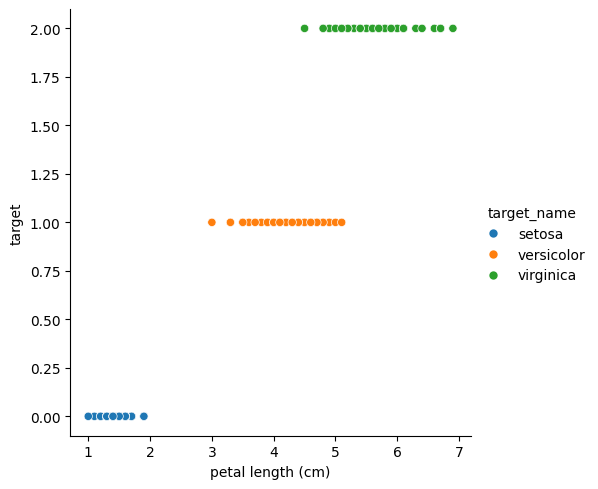

In [ ]:
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})


import seaborn as sns
sns.relplot(x=petal_length, y="target", hue="target_name", data=df)


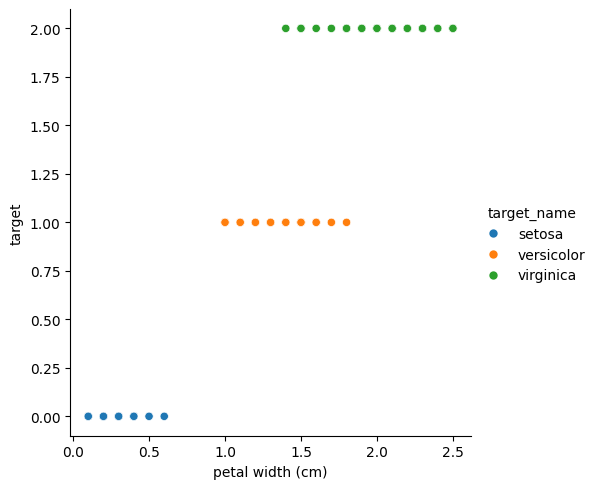

In [ ]:
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})


import seaborn as sns
sns.relplot(x=petal_width, y="target", hue="target_name", data=df)


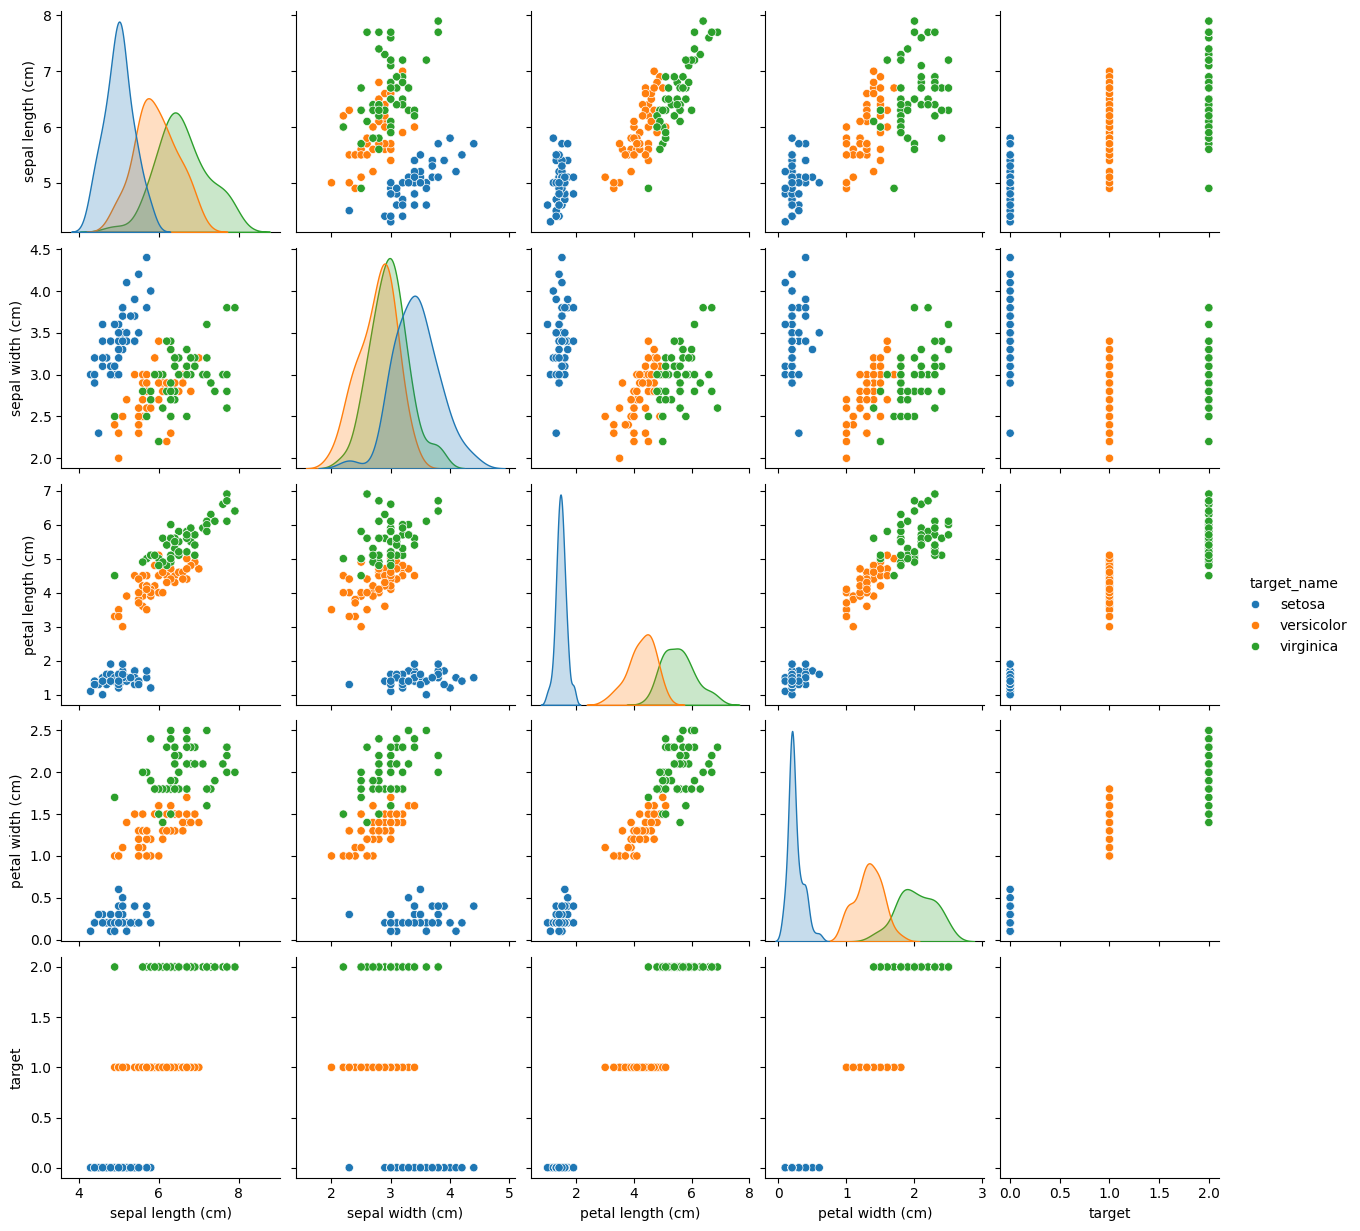

In [ ]:
sns.pairplot(df, hue="target_name")

#Ok so We have some understanding of data so we will start modelling.


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)



#Now we will convert our data into numpy array as scikit learn works better with numpy.


In [ ]:
X_train = df_train.drop(columns = ["target", "target_name"]).values
y_train = df_train["target"].values



#Model Baseline. What is the simplest model that we want to implement?

Our worst case scenario currently is with accuracy of 0.33 where we make a guess as we have 3 different classes.

So our model should be at least greater than 33%.



#How to choose a model

In [ ]:
def single_feature_prediction(petal_length):
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.9:
    return 1
  else:
    return 2

#We are doing this manually from the current informations we have.


In [ ]:
manual_y_prediction = np.array([single_feature_prediction(x) for x in X_train[:,2]])
manual_y_prediction

array([1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       1, 1])

In [ ]:
manual_model_accuracy = np.mean(manual_y_prediction == y_train)
print(manual_model_accuracy)
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

0.9375
Manual model accuracy: 93.75%


#Now we will try some actual models out there.
1. Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()





In [ ]:
xt, xv, yt, yv = train_test_split(X_train, y_train, test_size=0.2)
model.fit(xt, yt)

LogisticRegression()

In [ ]:
y_predict = model.predict(xv)
model.score(xv, yv)



0.9565217391304348

### Now we will do cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

np.float64(0.9640316205533596)

##Ok 96% is great but we need to see why we are mispredicting?


#Model Tuning

Tweaking the parameters and hyperParameter to try to find better accuracy.

In [ ]:
for reg_param in (0.1, 0.3, 0.5, 1.3, 1.9, 2, 2.5, 4):
  model = LogisticRegression(max_iter=200, C=reg_param)
  accuracies = cross_val_score(model, X_train, y_train, cv=5)
  print(f"Model Accuray: {np.mean(accuracies) * 100:.2f}%")

Model Accuray: 94.66%
Model Accuray: 94.62%
Model Accuray: 95.53%
Model Accuray: 96.40%
Model Accuray: 99.09%
Model Accuray: 99.09%
Model Accuray: 99.09%
Model Accuray: 99.09%


#Final Model:


In [ ]:
model = LogisticRegression(max_iter=200, C=1.2)


#Checking on test set.

In [ ]:
X_test = df_test.drop(columns = ["target", "target_name"]).values
y_test = df_test["target"].values


##Now train the final model with all of training data.



In [ ]:
model.fit(X_train, y_train)


LogisticRegression(C=1.2, max_iter=200)

In [ ]:
y_test_predict = model.predict(X_test)
print(f"Test Accuracy: {model.score(X_test, y_test) * 100:.2f}%")

Test Accuracy: 94.74%


#CONCLUSION...
We achieved 94.74% accuracy using our logistic regression model.



